In [1]:
%load_ext autoreload
%autoreload 2
import imagej
import scyjava as sj
sj.config.add_options('-Xmx6g')
# Initialize ImageJ with the Fiji distribution in interactive mode
ij = imagej.init('sc.fiji:fiji', mode='interactive')
print(f"ImageJ2 version: {ij.getVersion()}")

from scyjava import jimport
# Import the necessary Java classes
#Set up the Java environment
System = jimport('java.lang.System')
import ants
from wsifir.utils import get_affine_matrix_from_ants
import numpy as np


ImageJ2 version: 2.16.0/1.54g


c:\Users\molanre1\AppData\Local\miniconda3\envs\wsifir-env\lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


: 

In [2]:
Runtime = jimport('java.lang.Runtime')
print(Runtime.getRuntime().maxMemory() / (2**20), "MB available to Java")

6144.0 MB available to Java


In [3]:
# Load both the IF and IHC images.
if_url = r"C:\Users\molanre1\Desktop\MES27_MP_QUKPolaris_1_[18884,58456].im3" # Adjust the path as needed
if_image = ij.io().open(if_url)

ihc_url = r"C:\Users\molanre1\Desktop\MES27_mIHC_lineage_QUKPolaris_1_[18831,58444].im3" # Adjust the path as needed
ihc_image = ij.io().open(ihc_url)

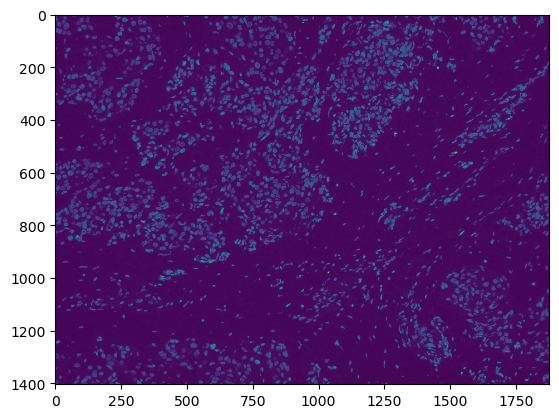

In [ ]:
sliced_if = ij.py.show(if_image[:,:,1])
sliced_if

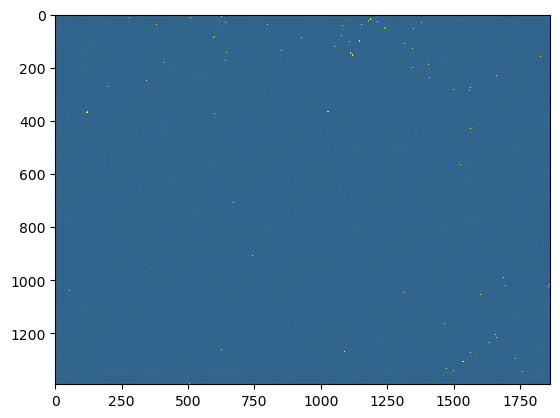

In [ ]:
sliced_ihc = ij.py.show(ihc_image[:,:,1])
sliced_ihc

In [ ]:

# Convert the images to numpy arrays
sliced_if_np = ij.py.from_java(sliced_if)
sliced_ihc_np = ij.py.from_java(sliced_ihc)

#Convrt the images to ANTsImage format
ants_if = ants.from_numpy(sliced_if_np)
ants_ihc = ants.from_numpy(sliced_if_np)


# see what it looks like for rigid
registered_image_a = ants.registration(
    fixed=sliced_if, moving=sliced_ihc, type_of_transform='Rigid', 
)
# 0,1 and 1,0 should be zero for rigid
# 0,0 and 1,1 are the rotation and 0,2 # and 2,0 are the translation
rigid_affine = get_affine_matrix_from_ants(registered_image_a['invtransforms'][0])  
rigid_affine